# *`BISTRO`* Simulation Visualization `Lite`

**v2.0 ----------------------------------------------------**

*updated 04/24/2020*

<h1>Table of Contents<span class="tocSkip"></span></h1>


<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Mode-Choice-by-hour-of-the-day" data-toc-modified-id="Mode-Choice-by-hour-of-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode Choice by hour of the day</a></span></li><li><span><a href="#Mode-Choice-per-income-group" data-toc-modified-id="Mode-Choice-per-income-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mode Choice per income group</a></span></li><li><span><a href="#Mode-Choice-per-age-group" data-toc-modified-id="Mode-Choice-per-age-group-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mode Choice per age group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Secondary-locations-trips" data-toc-modified-id="Secondary-locations-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Secondary locations trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time-by-mode" data-toc-modified-id="Average-travel-time-by-mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time by mode</a></span></li><li><span><a href="#Travel-time-by-mode-over-the-day" data-toc-modified-id="Travel-time-by-mode-over-the-day-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Travel time by mode over the day</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

The purpose of this notebook is to give a quick visualization of your simulation performance compared to BAU which you may find useful to test out before submitting. For a complete visualization `Dashboard`, see [here](https://github.com/bistro-its-berkeley/BISTRO_Dashboard)

To understand the concrete impacts of a set of policy inputs (`submission-inputs`) on the transporation network, we have provided an utility called `visualization.py` (located in the `/utilities` folder) to:

- **Visualize** the inputs and outputs of YOUR BISTRO run
- **Compare** the inputs and outputs of YOUR BISTRO run **to the BAU scenario**. <br> 

For the purpose of example, we demonstrate the use of the script with the outputs of a random run located in the `examples/example_run_output_folder` folder but you can use it for any other BISTRO run by adapting the paths accordingly, or moving your simulation output of the given senario under the folder.

**Note 1**: This notebook and accompanying utilities are written in Python 3.5+. Please install associated requirements using command `pip install -r requirements.txt` in your current conda environment.

**Note 2**: It is assumed that this notebook is started from the `/examples` folder.

The notebook is organized as follows:<br><br>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/examples"
import sys
import os
from os import path
from pathlib import Path
os.chdir('../utilities')
import visualization as viz
import plans_parser as parser
from fixed_data_visualization import *

import math

# To parse .xml output files
from lxml import etree

%load_ext autoreload
%autoreload 2

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data 

To use this notebook **for other scenarios than the BAU, change:** <br> 
* the **`path_output_folder`** of the output (`sioux_faux-<sample_size>__<date and time>` folder) <br>
    * For example, the simulation output folder for sioux faux could look something like, `/Users/admin/Desktop/BISTRO_Research/BISTRO-Starter-Kit-master/output/sioux_fauxsioux_faux-15k__2020-04-20_19-34-41`
* the `iter_number` (number of iterations of your run: integer)
* the `sample_size` (sample size of the simulated scenario: string, '1k' or '15k')

In [29]:
# ********** CHANGE SAMPLE_SIZE (string) ******************* #
# '1k' or '15k'
sample_size = '15k'

# ********** CHANGE iter_number (integer) ******************* #
iter_number = 20
ITER_FOLDER = f"it.{iter_number}"

# ********** CHANGE PATH OUTPUT FOLDER (pathlib.Path object)***************** #
path_output_folder = Path.cwd().parent / EXAMPLES / "example_run_output_folder"

In [41]:
# Check for the output path here:

print(path_output_folder)

/Users/admin/Desktop/BISTRO_Research/BISTRO-Starter-Kit-master/examples/example_run_output_folder


Create instances of the classes ReferenceData and ResultFiles to import fixed data needed further. <br> <br>
The process generates the `.csv` files from the parsed `.xml` files for the **BAU scenario** (`path_output_folder_bau`). <br> <br> *Note:* This process might take up to 10 minutes to parse if it was not already done for the scenario. Once it has been parsed on time, the generated csv files are stored in the output_folder so the parssing process will not take place again if the cell is rerun. If you want to improve the speed of the plans_parser.py module, feel free to submit some code in a Pull Request. It will give you points for the Citizenship Prize! ;-)

In [4]:
ref = ReferenceData(sample_size)
ref

In [5]:
# For the BAU scenario
res_bau = ResultFiles(ref.path_output_folder_bau, 100, ref)

In [6]:
# For the new scenario
res_scenario = ResultFiles(path_output_folder, iter_number, ref)

Import resulting dataframes **for the BAU scenario.**

In [7]:
trips_df_bau = res_bau.trips_df
person_df_bau = res_bau.person_df
activities_df_bau = res_bau.activities_df
legs_df_bau = res_bau.legs_df
paths_traversals_df_bau = res_bau.paths_traversals_df

Import resulting dataframes **for the new scenario**.

In [8]:
trips_df = res_scenario.trips_df
person_df = res_scenario.person_df
activities_df = res_scenario.activities_df
legs_df = res_scenario.legs_df
paths_traversals_df = res_scenario.paths_traversals_df

-----

## Inputs

### Incentives

Importing the `ModeIncentives.csv ` input file for the BAU scenario and your new scenario.

In [9]:
incentives_data_bau = res_bau.incentives_data
incentives_data = res_scenario.incentives_data

Plotting the `incentives` inputs for the BAU scenario and your new scenario. <br>For the BAU, no incentives are provided. 

            mode amount  min_age  max_age  min_income  max_income  \
0  OnDemand_ride  0      0        0        0           0            
0  drive_transit  0      0        0        0           0            
0  walk_transit   0      0        0        0           0            

   amount_normalized  
0  0.0                
0  0.0                
0  0.0                
            mode amount  min_age  max_age  min_income  max_income  \
1  OnDemand_ride  7.1    96       110      10000       79999        
0  drive_transit  0      0        0        0           0            
0  walk_transit   6.4    66       80       75000       89999        
2  walk_transit   3.9    16       100      20000       74999        
3  walk_transit   7.1    51       120      105000      124999       

   amount_normalized  
1  0.142              
0  0.000              
0  0.128              
2  0.078              
3  0.142              


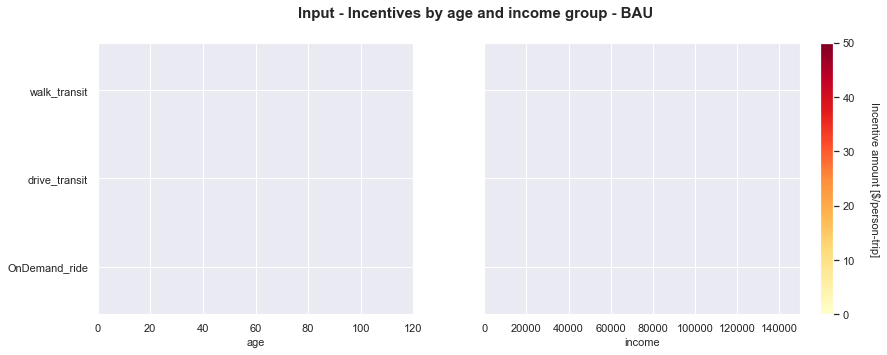

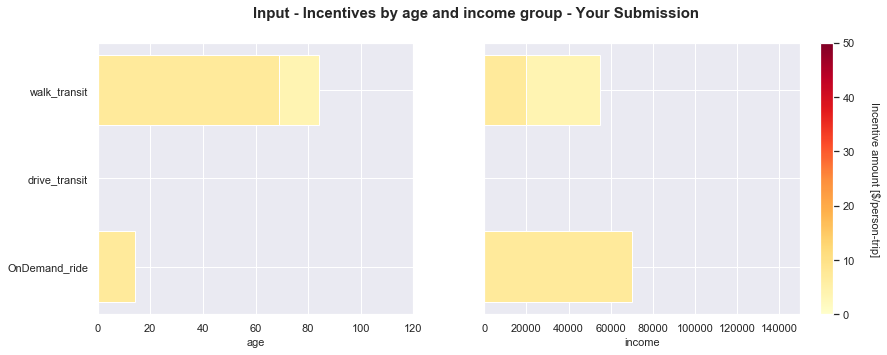

In [12]:
_ = viz.plot_incentives_inputs(incentives_data_bau, max_incentive, max_age, max_income, "BAU")
_ = viz.plot_incentives_inputs(incentives_data, max_incentive, max_age, max_income, "Your Submission")

-----

### FleetMix

Importing the `FleetMix.csv ` input file

In [13]:
fleet_mix_data_bau = res_bau.fleet_mix_data
fleet_mix_data = res_scenario.fleet_mix_data

Plotting the `vehicle fleet mix` inputs for the BAU scenario and your new scenario. <br>For the BAU, all bus lines are operating with `BUS-DEFAULT` buses. 

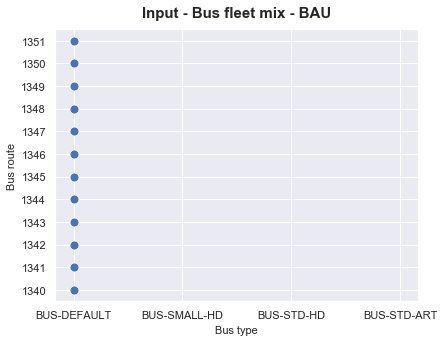

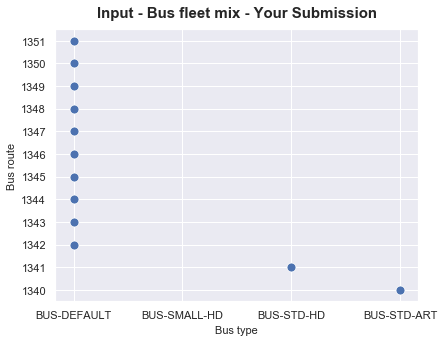

In [14]:
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data_bau, ref.route_ids, ref.buses_list, ref.agency_ids, "BAU")
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data, ref.route_ids, ref.buses_list, ref.agency_ids, "Your Submission")

-----

### Fares

Importing the `MassTransitFares.csv` input file for the BAU scenario and your new scenario.

In [15]:
fares_data_bau = res_bau.bus_fares_data
fares_data = res_scenario.bus_fares_data

Plotting the Mass Transit Fares inputs for the BAU scenario and your new scenario. <br><br> For the BAU, the Sioux Faux bus fare policy works as follow: 
* Children 5 yrs. and under\: FREE
* Children 6 to 10 yrs.\: \$0.75
* Children 11 to 18 yrs and Adults 65 yrs. and under: \$1.50
* Persons over 65 yrs\: FREE

In [16]:
fares = viz.process_fares_data(fares_data, fares_data_bau, max_fare, ref.route_ids)
fares.head()

,agencyId,routeId,amount,min_age,max_age,amount_normalized
4,217,1351,0.70,61,105,0.070
1,217,1340,0.75,6,10,0.075
1,217,1349,0.75,6,10,0.075
0,217,1340,1.50,10,65,0.150
0,217,1349,1.50,10,65,0.150


In [17]:
np.array(fares['routeId'])

array([1351, 1340, 1349, 1340, 1349, 1350, 1343, 1341, 1344, 1342, 1348,
       1345, 1347, 1346])

<BarContainer object of 14 artists>

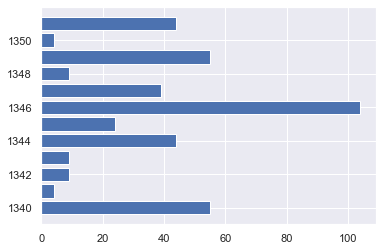

In [18]:
plt.barh(np.array(fares['routeId']), width=fares['max_age']-fares['min_age'])

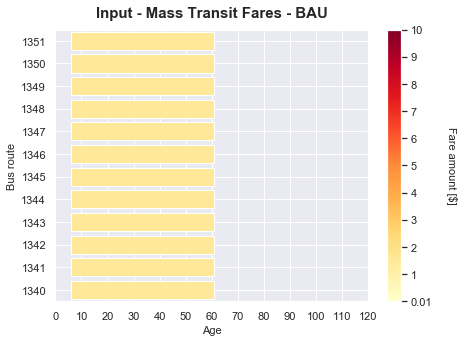

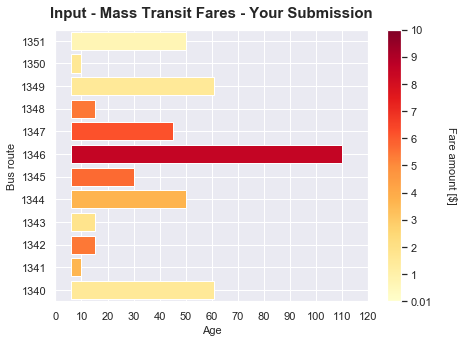

In [19]:
_ = viz.plot_mass_transit_fares_inputs(fares_data_bau, fares_data_bau, max_fare, ref.route_ids, "BAU")
_ = viz.plot_mass_transit_fares_inputs(fares_data, fares_data_bau, max_fare, ref.route_ids, "Your Submission")

-----

### Bus frequency

Importing the `FrequencyAdjustment.csv` input files for the BAU scenario and the new run scenario.

In [20]:
bus_frequencies_data = res_scenario.bus_frequency_data

Note that the `FrequencyAdjustement.csv` input file of the BAU is empty as the BAU bus schedule is a non-frequency based schedule. There was not any function implemented to plot the frequencies.txt file of hte BAU bus schedule.
<br> Thus, this section 2.4 will be useful to plot the `FrequencyAdjustement.csv` input file of new runs (with different inputs than the BAU) only.

Plotting the `Bus frequency` inputs for the new scenario.

No handles with labels found to put in legend.


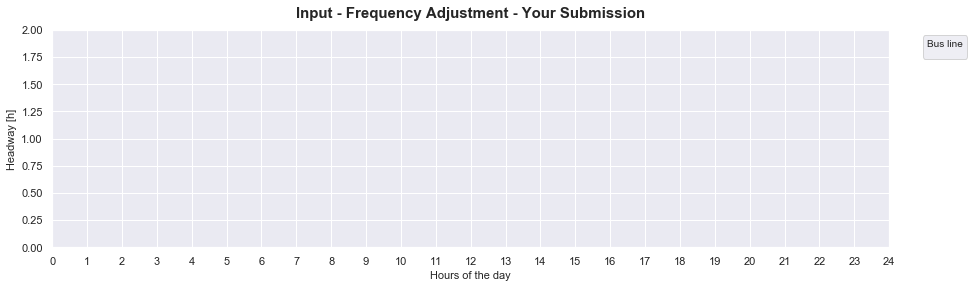

In [21]:
_ = viz.plot_bus_frequency(bus_frequencies_data, ref.route_ids, "Your Submission")

-----

## Scores

Importing the `submissionScores.csv` file for the new scenario.

In [22]:
scores_data = res_scenario.scores_data

Plotting the `weighted scores` for the new scenario. <br> When the weighted subscore is smaller than 0, it means that the new scenario performs better than the BAU scenario.

No handles with labels found to put in legend.


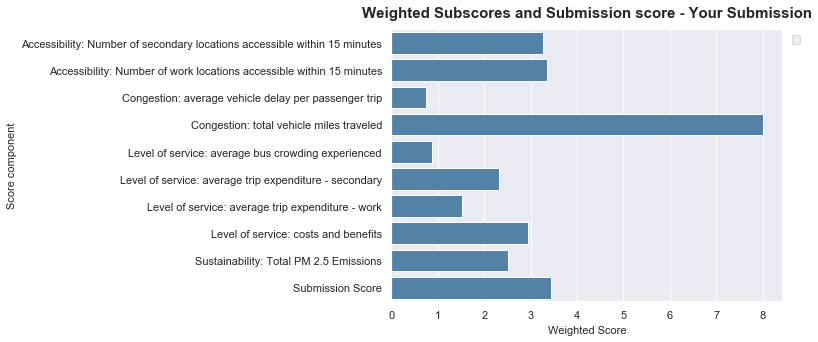

In [23]:
_ = viz.plot_weighted_scores(scores_data, "Your Submission")

-----

## Mode choice

### Overall mode choice

Importing the `modeChoice.csv` output file for the BAU scenario and your new scenario.

In [24]:
mode_choice_data_bau = res_bau.mode_choice_data
mode_choice_data = res_scenario.mode_choice_data

Plotting the `Overall Mode Choice` output for the BAU scenario and your new scenario.

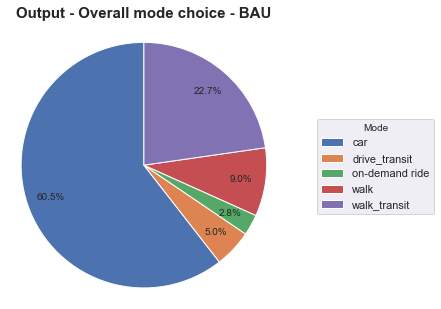

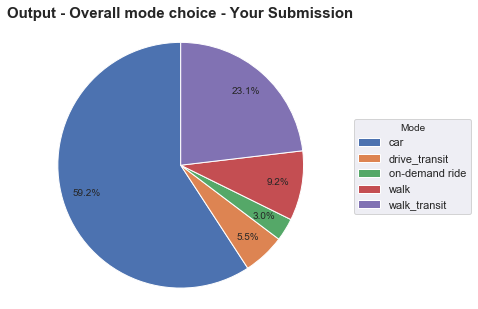

In [25]:
_ = viz.plot_overall_mode_choice(mode_choice_data_bau, "BAU")
_ = viz.plot_overall_mode_choice(mode_choice_data, "Your Submission")

-----

### Mode Choice by hour of the day

Importing the `{iter_number}.modeChoice.csv`output file. <br> (For the BAU scenario, `iter_number` = 100)

In [31]:
mode_choice_path_bau = ref.path_output_folder_bau / ITERS / "it.100" / "100.modeChoice.csv"
mode_choice_path = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.modeChoice.csv"


In [28]:
mode_choice_path

PosixPath('/Users/admin/Desktop/BISTRO_Research/BISTRO-Starter-Kit-master/examples/example_run_output_folder/ITERS/it.1/1.modeChoice.csv')

Plotting the `Mode Choice by hour of the day` output for the BAU scenario and your new scenario.

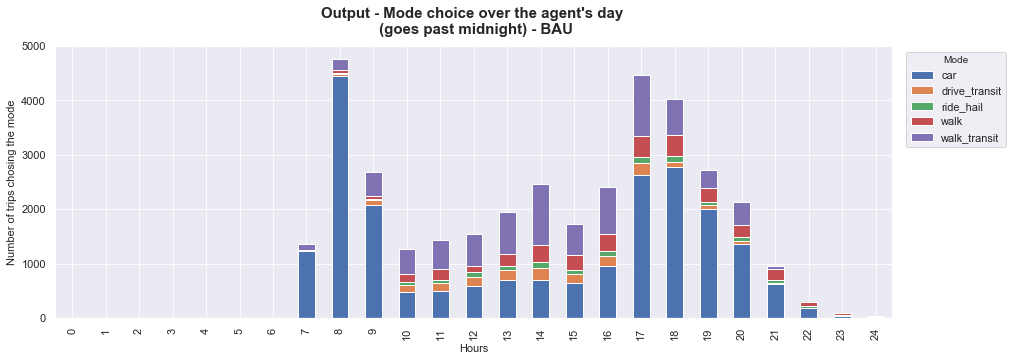

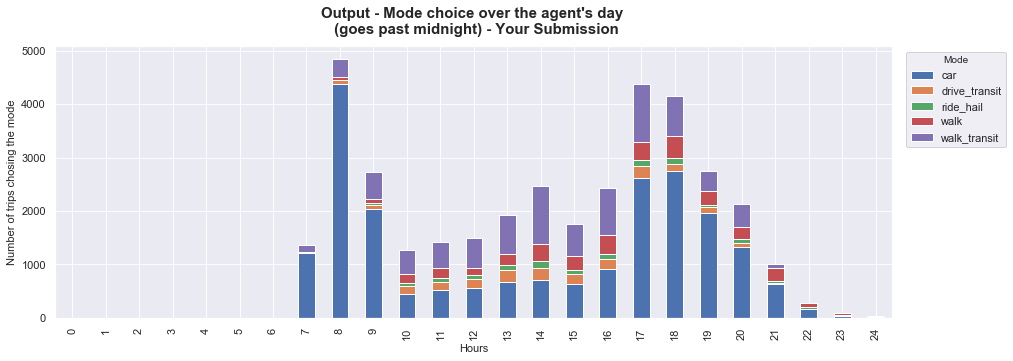

In [32]:
_ = viz.plot_mode_choice_by_hour(mode_choice_path_bau, "BAU")
_ = viz.plot_mode_choice_by_hour(mode_choice_path, "Your Submission")

-----

### Mode Choice per income group

 Plotting `Mode choice per income group` output for the BAU scenario and your new scenario.

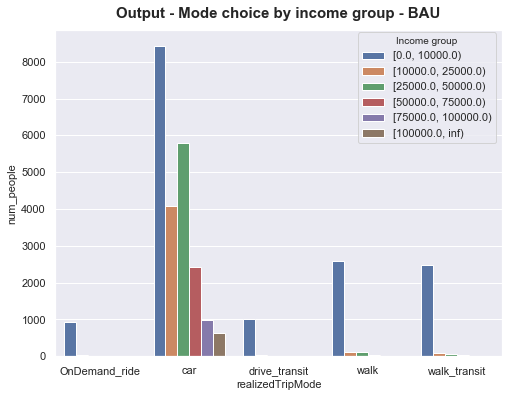

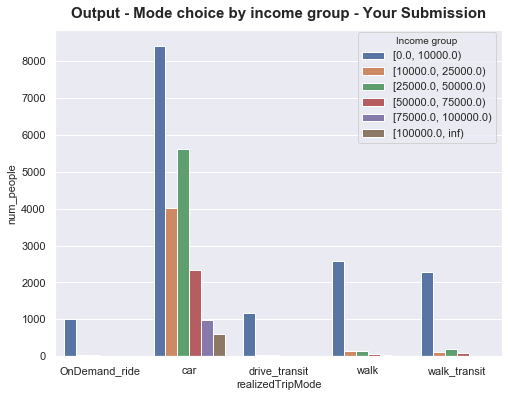

In [33]:
_ = viz.plot_mode_choice_by_income_group(person_df_bau, trips_df_bau, "BAU")
_ = viz.plot_mode_choice_by_income_group(person_df, trips_df, "Your Submission")

-----

### Mode Choice per age group

Plotting the `Mode choice per age group` output for the BAU scenario and your new scenario..

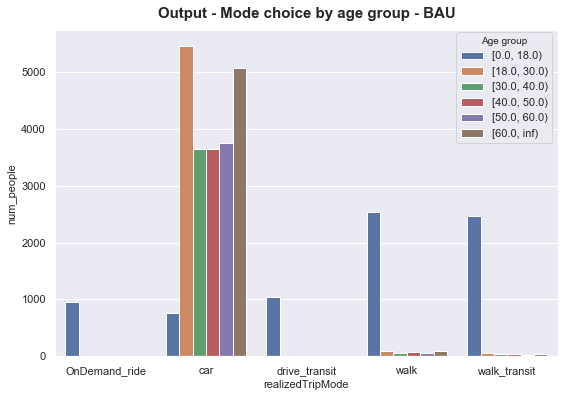

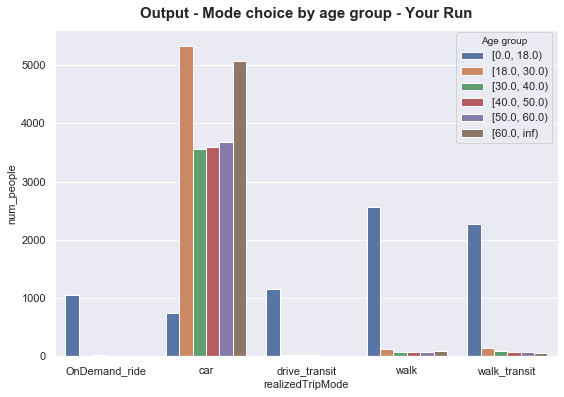

In [34]:
_ = viz.plot_mode_choice_by_age_group(person_df_bau, trips_df_bau, "BAU")
_ = viz.plot_mode_choice_by_age_group(person_df, trips_df, "Your Run")

-----

## Accessibility [Under Construction]

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

### Work-based trips

In [35]:
_ = viz.plot_accessibility(sample_name, network_file, bau_linkstats_file, population_file, utm_zone, poi_types, time_ranges, max_time, morning_peak, evening_peak, "BAU")


AttributeError: module 'visualization' has no attribute 'plot_accessibility'

### Secondary locations trips

## Level of service

### Travel expenditure [Under Construction]

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

In [ ]:
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df_bau, "BAU")
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df, "Your Run")

### Bus crowding

Plotting the `Average Hours of Bus Crowding` output for the BAU scenario and your new scenario.

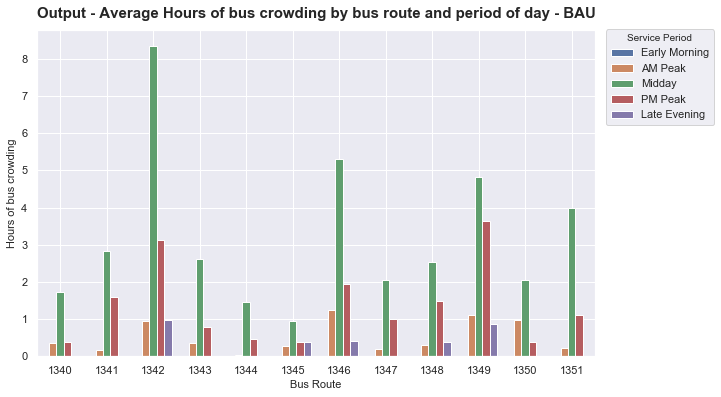

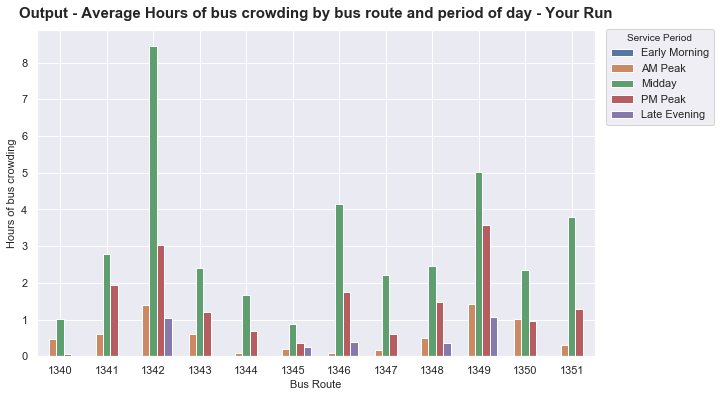

In [36]:
_ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df_bau, ref.trip_to_route, ref.seating_capacities, ref.transit_scale_factor, "BAU")
_ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df, ref.trip_to_route, ref.seating_capacities,ref.transit_scale_factor, "Your Run")


-----

## Congestion

### Average travel time by mode

Importing the `averageTravelTimes.csv` output file for the BAU scenario and your new scenario.

In [37]:
travel_time_data_bau = ref.path_output_folder_bau / ITERS / "it.100" / "100.averageTravelTimes.csv"
travel_time_data = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.averageTravelTimes.csv"

Plotting the `Average travel time by mode` output.

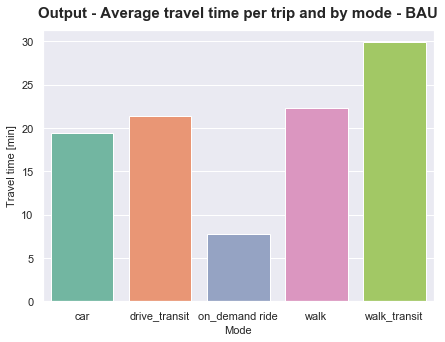

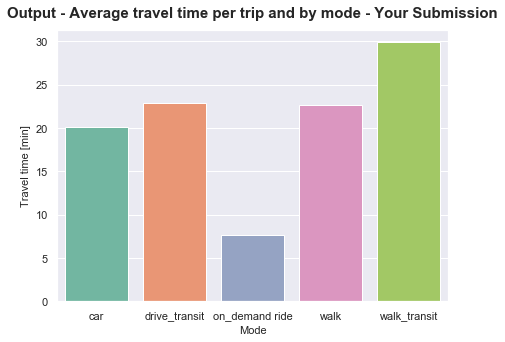

In [38]:
_ = viz.plot_travel_time_by_mode(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_by_mode(travel_time_data, "Your Submission")

### Travel time by mode over the day

Plotting the `Travel time by mode over the day` output for the BAU scenario and your new scenario.

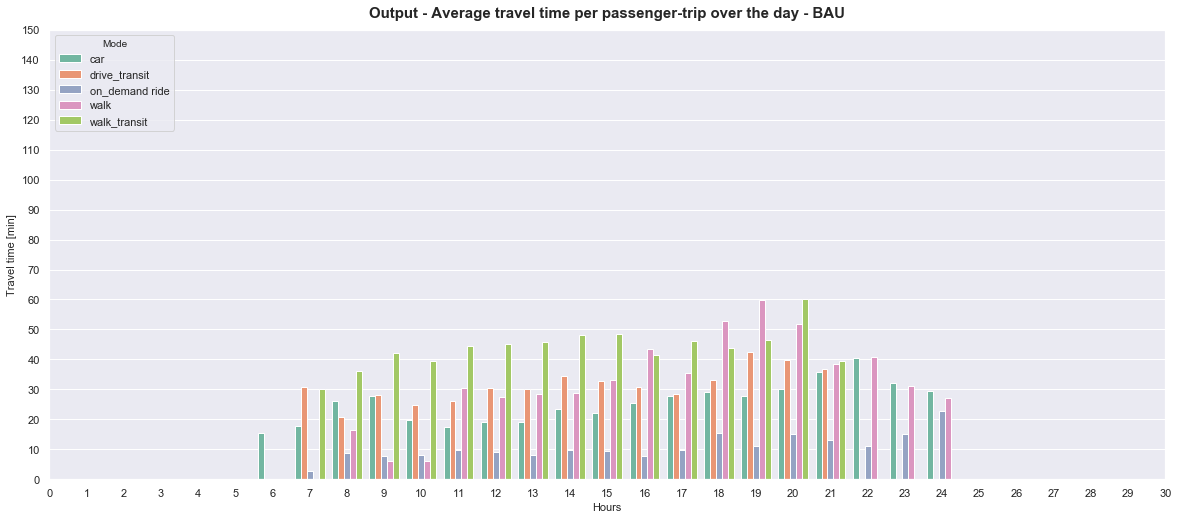

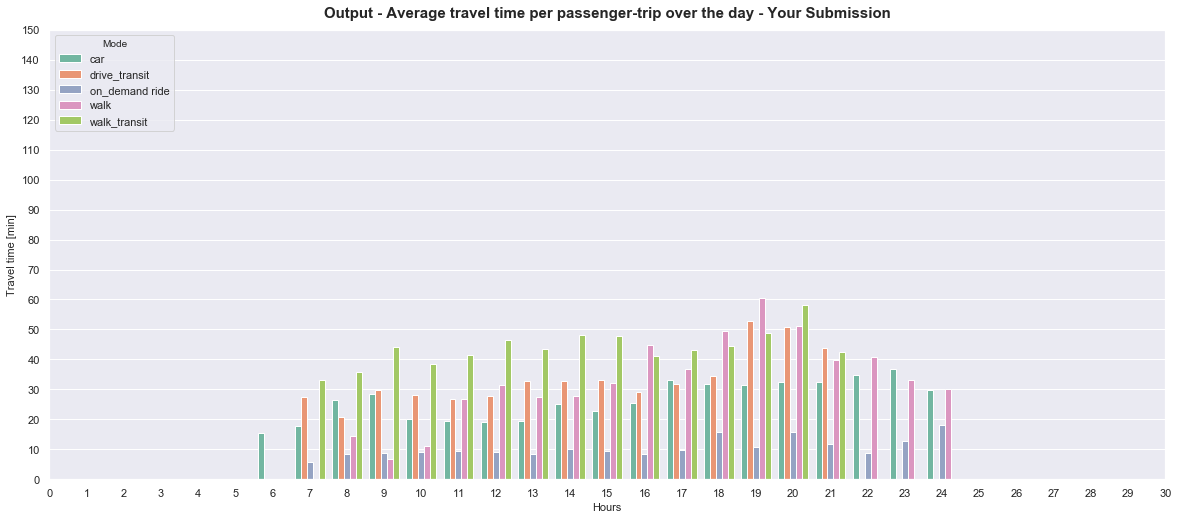

In [39]:
_ = viz.plot_travel_time_over_the_day(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_over_the_day(travel_time_data, "Your Submission")


-----

## Costs and Benefits of Mass Transit Level of Service Intervention

Plotting the `Costs and Benefits by route` output for the BAU scenario and your new scenario.

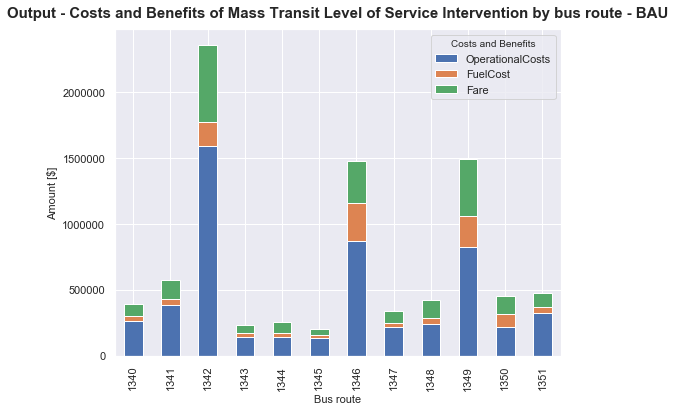

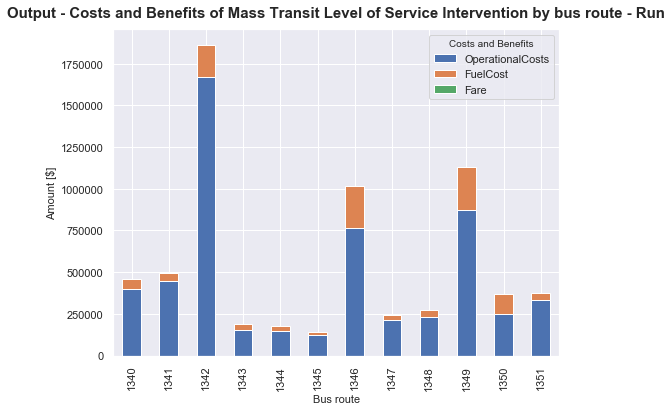

In [40]:
_ = viz.plot_cost_benefits(paths_traversals_df_bau, legs_df_bau, ref.operational_costs, ref.trip_to_route, "BAU")
_ = viz.plot_cost_benefits(paths_traversals_df, legs_df, ref.operational_costs, ref.trip_to_route, "Run")

## Sustainability [Under Construction]

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

-----